In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
import seaborn as sns
warnings.filterwarnings("ignore")
df2 = pd.read_csv("Fertilizer Prediction.csv")



In [2]:
df2.shape

(99, 9)

In [3]:
df2['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [4]:
y = df2['Fertilizer Name'].copy()
X = df2.drop('Fertilizer Name', axis=1).copy()

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[ 0.  0.  0. ... 37.  0.  0.]
 [ 0.  0.  1. ... 12.  0. 36.]
 [ 1.  0.  0. ...  7.  9. 30.]
 ...
 [ 0.  0.  1. ... 39.  0.  0.]
 [ 0.  0.  0. ... 15.  0. 41.]
 [ 1.  0.  0. ... 12.  0. 10.]]


In [6]:
df2.head()


,Temparature,Humidity,Moisture,Soil Type,Crop Type,N,K,P,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [7]:
df2["Fertilizer Name"].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [8]:
df2.describe()

,Temparature,Humidity,Moisture,N,K,P
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


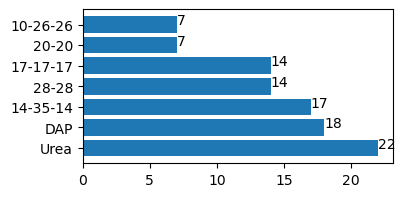

In [9]:
labels = df2["Fertilizer Name"].unique()
counts = list(df2["Fertilizer Name"].value_counts())

plt.figure(figsize = (4,2))
plt.barh(labels, counts)
  
for index, value in enumerate(counts):
    plt.text(value, index,
             str(value))
plt.show()

In [10]:
df2.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type', 'N',
       'K', 'P', 'Fertilizer Name'],
      dtype='object')

In [11]:
continuous_data_cols = ["Temparature", "Humidity ", "Moisture", "N", "P"]
categorical_data_cols = ["Soil Type", "Crop Type"]

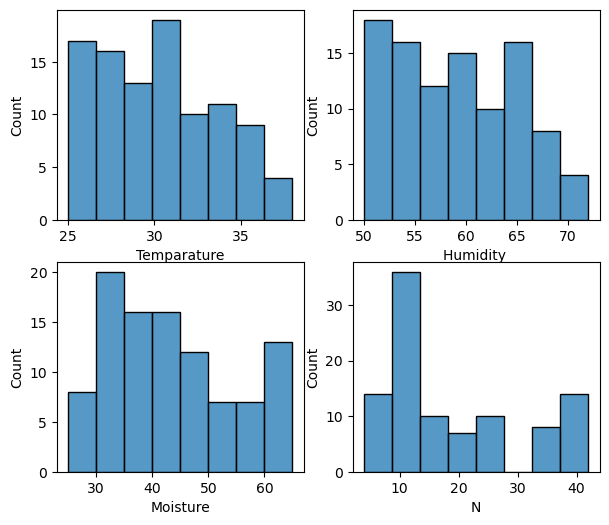

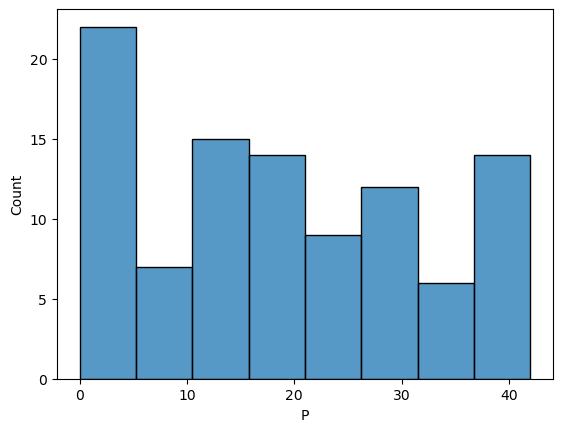

In [12]:
plt.figure(figsize=(7,6))
i = 1
for column in continuous_data_cols[:-1]:
    plt.subplot(2,2,i)
    sns.histplot(df2[column])
    i+=1
plt.show()

sns.histplot(df2[continuous_data_cols[-1]])
plt.show()

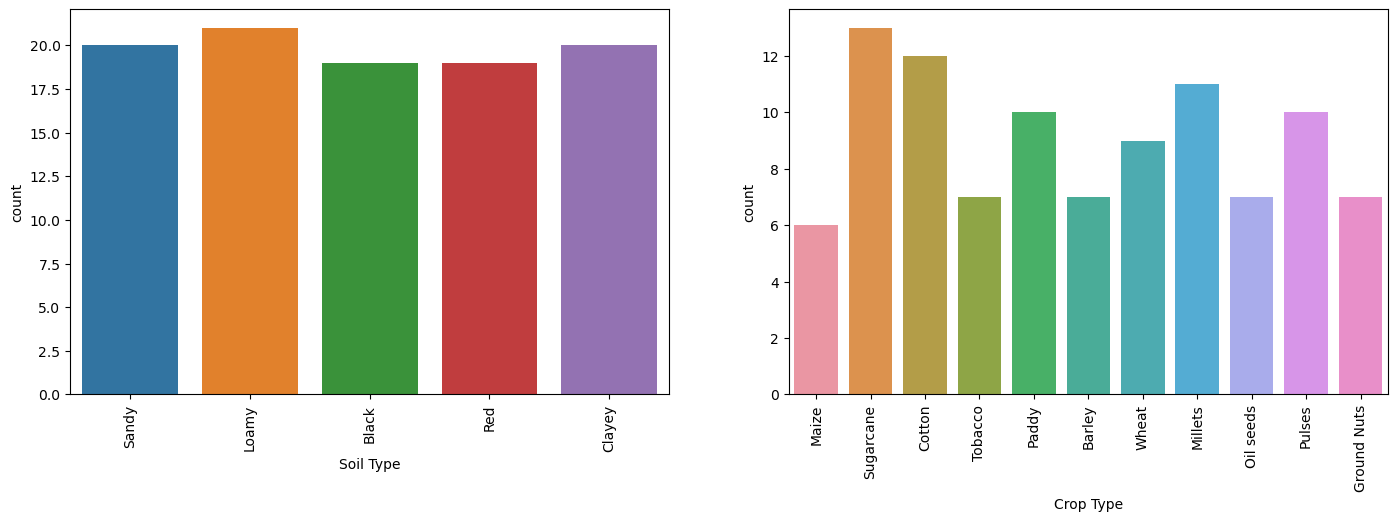

In [13]:
plt.figure(figsize=(17,5))
i = 1
for column in categorical_data_cols:
    plt.subplot(1,2,i)
    sns.countplot(df2[column])
    plt.xticks(rotation = 90)
    i+=1
plt.show()


In [14]:
from sklearn.model_selection import train_test_split


In [15]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder
#encoding Soil Type variable
encode_soil = LabelEncoder()
df2['Soil Type'] = encode_soil.fit_transform(df2['Soil Type'])

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type


,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [16]:
encode_ferti = LabelEncoder()
df2['Fertilizer Name'] = encode_ferti.fit_transform(df2['Fertilizer Name'])

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-26-26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


In [17]:
encode_crop =  LabelEncoder()
df2['Crop Type'] = encode_crop.fit_transform(df2['Crop Type'])

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [18]:
fertname_label_encoder = LabelEncoder()
df2["Fertilizer Name"] = fertname_label_encoder.fit_transform(df2["Fertilizer Name"])
fertname_dict = {}


In [19]:
for i in range(len(df2["Fertilizer Name"].unique())):
    fertname_dict[i] = fertname_label_encoder.inverse_transform([i])[0]
print(fertname_dict)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


In [20]:
X = df2[df2.columns[:-1]]
y = df2[df2.columns[-1]]

In [21]:
from collections import Counter

counter = Counter(y)
counter

Counter({6: 22, 5: 18, 1: 14, 4: 17, 2: 7, 3: 14, 0: 7})

In [22]:
import os
import numpy as np
import pandas as pd
import imblearn
from imblearn.over_sampling import SMOTE
upsample = SMOTE()
X, y = upsample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({6: 22, 5: 22, 1: 22, 4: 22, 2: 22, 3: 22, 0: 22})


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.3, random_state = 0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (107, 8), (107,)
Train Data: (47, 8), (47,)


In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Accuracy at k = 1 is 85.1063829787234
Accuracy at k = 2 is 74.46808510638297
Accuracy at k = 3 is 85.1063829787234
Accuracy at k = 4 is 68.08510638297872
Accuracy at k = 5 is 72.3404255319149
Accuracy at k = 6 is 70.2127659574468
Accuracy at k = 7 is 70.2127659574468
Accuracy at k = 8 is 63.829787234042556
Accuracy at k = 9 is 57.446808510638306
Accuracy at k = 10 is 51.06382978723404
Accuracy at k = 11 is 53.191489361702125
Accuracy at k = 12 is 55.319148936170215
Accuracy at k = 13 is 59.57446808510638
Accuracy at k = 14 is 57.446808510638306
Accuracy at k = 15 is 57.446808510638306
Accuracy at k = 16 is 61.702127659574465
Accuracy at k = 17 is 61.702127659574465
Accuracy at k = 18 is 59.57446808510638
Accuracy at k = 19 is 59.57446808510638
Accuracy at k = 20 is 61.702127659574465
Accuracy at k = 21 is 57.446808510638306
Accuracy at k = 22 is 57.446808510638306
Accuracy at k = 23 is 55.319148936170215
Accuracy at k = 24 is 57.446808510638306
Accuracy at k = 25 is 53.191489361702125


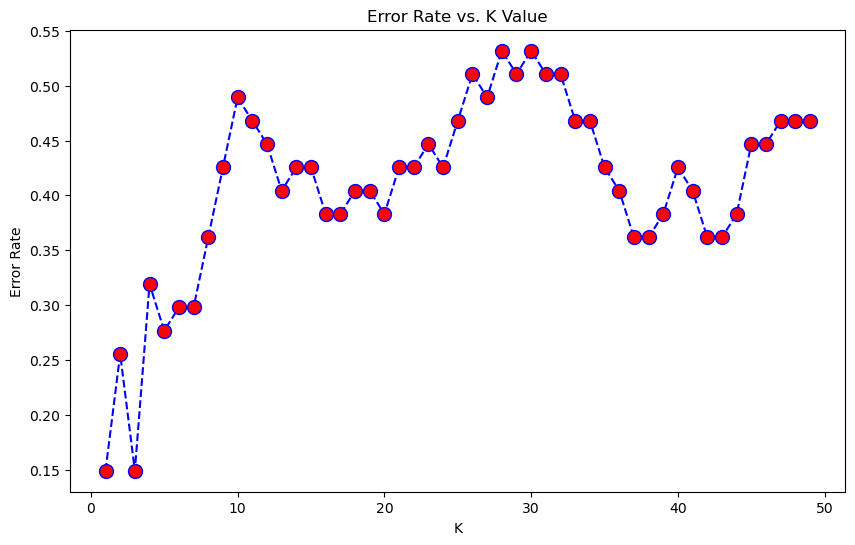

In [34]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
error_rate = []
for i in range(1, 50):
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = i))
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = (accuracy_score(y_test, predictions))*100
    print(f"Accuracy at k = {i} is {accuracy}")
    error_rate.append(np.mean(predictions != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [35]:
#SVM
svm_pipeline = make_pipeline(StandardScaler(), SVC(probability=True))
svm_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = svm_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")

print()

# Accuray On Whole Data
predictions = svm_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")

Accuracy on Test Data: 91.48936170212765%

Accuracy on Whole Data: 14.285714285714285%


In [36]:
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 18))
rf_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = rf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")

print()

# Accuray On Whole Data
predictions = rf_pipeline.predict(X.values)
#accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")

Accuracy on Test Data: 100.0%

Accuracy on Whole Data: 100.0%


In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")
xgb_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state = 18))
xgb_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = xgb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")


print()

# Accuray On Whole Data
predictions = xgb_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")

Train Data: (123, 8), (123,)
Train Data: (31, 8), (31,)
Accuracy on Test Data: 100.0%

Accuracy on Whole Data: 100.0%


In [38]:
#pickling the file
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(xgb_pipeline,pickle_out)
pickle_out.close()

In [30]:
model = pickle.load(open('classifier.pkl','rb'))
ans = model.predict([[29,52,38,4,3,37,0,0]])
if ans[0] == 0:
    print("10-26-26")
elif ans[0] ==1:
    print("14-35-14")
elif ans[0] == 2:
    print("17-17-17	")
elif ans[0] == 3:
    print("20-20")
elif ans[0] == 4:
    print("28-28")
elif ans[0] == 5:
    print("DAP")
else:
    print("Urea")

Urea


In [31]:
df2.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,N,K,P,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6
